In [157]:
import numpy as np
import matplotlib.pyplot as plt
import colorcet as cc
from math import sqrt

In [158]:
#Define Function
N = 13
q = np.random.randn(N, 3)
q /= np.sqrt(np.sum(q**2, axis=1)).reshape(-1, 1)
x_ = q[:, 0]
y_ = q[:, 1]
z_ = q[:, 2]
def Thom(N, x_, y_, z_):
    '''Thomson Equation Definition'''
    sum = 0 
    for i in range(N):
        for j in range(N):
            if j != i:
                r = np.linalg.norm(q[i] - q[j])
                sum += 1/r
    return sum, r
r, sum = Thom(N, x_, y_, z_)

print(r)
print(Thom(N,x_, y_, z_))

281.4355485902509
(281.4355485902509, 1.3265580315834307)


In [147]:
print(x_)

[0.94941354 0.11752618 0.20032953]


In [159]:
def gradThom(N, x_, y_, z_):
    '''Thomson Equation Gradient'''
    grad_x = np.zeros((1, N))
    grad_y = np.zeros((1, N))
    grad_z = np.zeros((1, N))
    for i in range(N):
        for j in range(N):
            if j != i:
                    '''
                    grad_x[3*i] = partial of r_ij with respect to x_i
                    grad_y[3*i + 1] = partial of r_ij with respect to y_i
                    grad_z[3*i + 2] = partial of r_ij with respect to z_i
                    '''
                    grad_x[:,i] = -(x_[i]-x_[j])/(r**3)
                    grad_y[:,i] = -(y_[i]-y_[j])/(r**3)
                    grad_z[:,i] = -(z_[i]-z_[j])/(r**3)
                    grad = np.array([grad_x, grad_y, grad_z])


    return grad
print(gradThom(N, x_, y_, z_))

[[[-1.76248777e-08 -1.56969867e-08 -1.63106172e-08 -1.79126186e-08
    2.63346058e-08  3.42708826e-09 -1.99377416e-09 -3.38343291e-08
   -2.19490923e-08 -2.89834322e-08  5.17990060e-09  3.62885257e-08
   -3.62885257e-08]]

 [[-6.30093434e-08  8.45099519e-09  8.10734905e-09 -1.40707807e-08
   -8.85286378e-09 -7.60031771e-08 -7.41349004e-08 -3.12438695e-08
   -3.41454475e-08 -2.59031037e-08 -7.42975922e-08 -4.28334632e-09
    4.28334632e-09]]

 [[-8.67677971e-09 -2.36537835e-08 -2.34751426e-08  3.38857496e-09
   -4.74985039e-10 -3.32825984e-08 -4.36556793e-08 -5.67820318e-08
   -6.88193924e-08 -6.24473112e-08 -4.42808129e-08 -4.69704895e-08
    4.69704895e-08]]]


In [170]:
#Backtracking
beta = 0.5 
maxIter = 50 
tol = 1e-4 
alpha0 = 1 
def backTr(alpha, xn, yn, zn, direction):
    Un = Thom(N, xn, yn, zn)
    xn_1 = xn + alpha*direction[0]
    yn_1 = yn + alpha*direction[1]
    zn_1 = zn + alpha*direction[2]
    Un_1 = Thom(N, xn_1, yn_1, zn_1)
    while Un < Un_1:
        alpha = beta*alpha
        xn_1 = xn + alpha*direction[0]
        yn_1 = yn + alpha*direction[1]
        zn_1 = zn + alpha*direction[2]
        Un_1 = Thom(N, xn_1, yn_1, zn_1)
    return alpha

#back onto unit sphere so normalize
def projectBack(an, bn, cn):
    norm_free = sqrt(an**2 + bn**2 + cn**2)
    if ( norm_free > 1 ):
        an, bn, cn = an/norm_free, bn/norm_free, cn/norm_free
    return an, bn, cn

#PGD
def ThomPGD(x0, y0, z0):
    xn_vec = [x0] # iterations for x
    yn_vec = [y0] # iterations for y
    zn_vec = [z0] # iterations for z
    U = [Thom(N, x0, y0, z0)] # function values at the iterations
    i = 0 # counter for the iterations
    d = - gradThom(N, x0, y0, z0)  # Initial direction, negative gradient
    alpha = backTr(alpha0, x0, y0, z0, d)
    # Step size, and "free space" gradient descent update
    an, bn, cn = x0 + alpha*d[0], y0 + alpha*d[1], z0 + alpha*d[2]
    compare = [an, bn, cn]/np.linalg.norm([an, bn, cn]) - [x0, y0, z0]
    xn, yn, zn = projectBack(an, bn, cn)
    xn_vec.append(xn)
    yn_vec.append(yn)
    zn_vec.append(zn)
    U.append(Thom(N, xn, yn, zn))
    i += 1
    
    while( norm(compare)   >= tol and i < maxIter ):
        d = - gradThom(xn, yn, zn) 
        alpha = backTr(alpha0, xn, yn, zn, d)
        an, bn, cn = xn + alpha*d[0], yn + alpha*d[1], zn + alpha*d[2] # gradient descent
        compare = [an, bn, cn]/norm([an, bn, cn]) - [xn, yn, zn]
        xn, yn, zn = projectBack(an, bn, cn)
        xn_vec.append(xn)
        yn_vec.append(yn)
        zn_vec.append(zn)
        U.append(Thom(N, xn, yn, zn))
        i += 1
    return (xn, yn, zn), xn_vec, yn_vec, zn_vec, U
(xn, yn, zn), xn_vec, yn_vec, zn_vec, U = ThomPGD(x_, y_, z_)
print(ThomPGD(xn_vec, yn_vec, zn_vec))

TypeError: only size-1 arrays can be converted to Python scalars

NameError: name 'xn_vec' is not defined

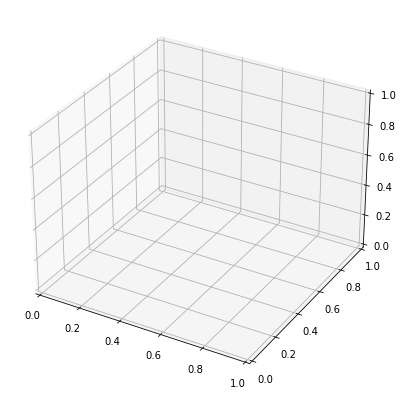

In [171]:
'''
List of problems:

1 Cant get scale to be from -1 to 1 on all axes
2 Cant get sphere
3 Cant plot scatter
4 Dont really know what to plot after performing PGD
5 Question 3
'''
#plot q in 3D w/ unit circle (Graphing Cell I can't get any of this to work)
Nx = 1000
Ny = 1000
x, y = np.meshgrid( np.linspace(-1, 1, Nx), np.linspace(-1, 1, Ny) )

fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(projection='3d')
ax.scatter(xn_vec, yn_vec, zn_vec, c=k, marker ='.')
plt.show()


'''z_sphere = np.zeros(x.shape)
for i in range(Nx):
    for j in range(Ny):
        xi = x[i, j]
        yi = y[i, j]
        zi = z[i, j]
        if xi**2 + yi**2 + z**2 <= 1:
            z_circ[i,j] = Thom(xi, yi)

plt.figure(figsize = (5, 5) )
im3 = plt.contourf(x, y, z_circ, levels = 30, 
                   cmap = 'cet_linear_wcmr_100_45_c42' )'''
plt.axis('equal')
plt.title('Thomson In Sphere')
plt.ylabel('y')
plt.xlabel('x')
circle = plt.Circle((0.0, 0.0), 1, 
                    color = '#002e79', fill = False)
ax = plt.gca()
ax.add_patch(circle)
plt.colorbar(im3)

plt.show


ValueError: Unrecognized character N in format string

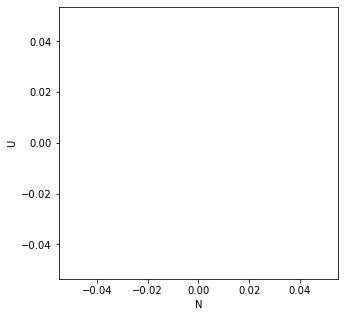

In [176]:
def Uapprox(N, a, b):
    a =  1.10461
    b = 0.137
    N**2 * (1 - a*N**(-.5) + b*N**(-1.5)) 
    return Uapprox(N, a, b)

plt.figure(figsize= (5, 5))
x, y = np.meshgrid(np.linspace(14, 100, Nx), np.linspace(50, 5000, Ny))
plt.axis('equal')
plt.ylabel('U')
plt.xlabel('N')
plt.plot( U, N, Uapprox, c = 'black')
plt.show()